# Stocks Forecast using Time Series

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import normaltest
import statsmodels.api as sm
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline


In [5]:
data = pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
data.info

<bound method DataFrame.info of              DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  \
0      1491226200  2363.6101     42.3300     143.6800     129.6300   
1      1491226260  2364.1001     42.3600     143.7000     130.3200   
2      1491226320  2362.6799     42.3100     143.6901     130.2250   
3      1491226380  2364.3101     42.3700     143.6400     130.0729   
4      1491226440  2364.8501     42.5378     143.6600     129.8800   
...           ...        ...         ...          ...          ...   
41261  1504209360  2472.2200     44.7200     164.1100     155.0900   
41262  1504209420  2471.7700     44.7300     164.1200     155.1600   
41263  1504209480  2470.0300     44.7400     164.0100     155.0650   
41264  1504209540  2471.4900     44.7100     163.8800     154.9600   
41265  1504209600  2471.4900     44.7400     163.9800     155.1600   

       NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  \
0          82.040    102.2300      85.2200       5

In [8]:
data.isnull().values.any()

False

In [9]:
df=data.copy()

In [10]:
#since date and sp 500 column not contibuting much, remove it
df.drop(['DATE','SP500'],axis=1,inplace=True)

In [11]:
print(df.shape)
df.head()

(41266, 500)


,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [12]:
AAPL=df['NASDAQ.AAPL']
ADP=df['NASDAQ.ADP']
CBOE=df['NASDAQ.CBOE']
CSCO=df['NASDAQ.CSCO']
EBAY=df['NASDAQ.EBAY']

In [13]:
type(AAPL)

pandas.core.series.Series

In [14]:
stock_list=['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']

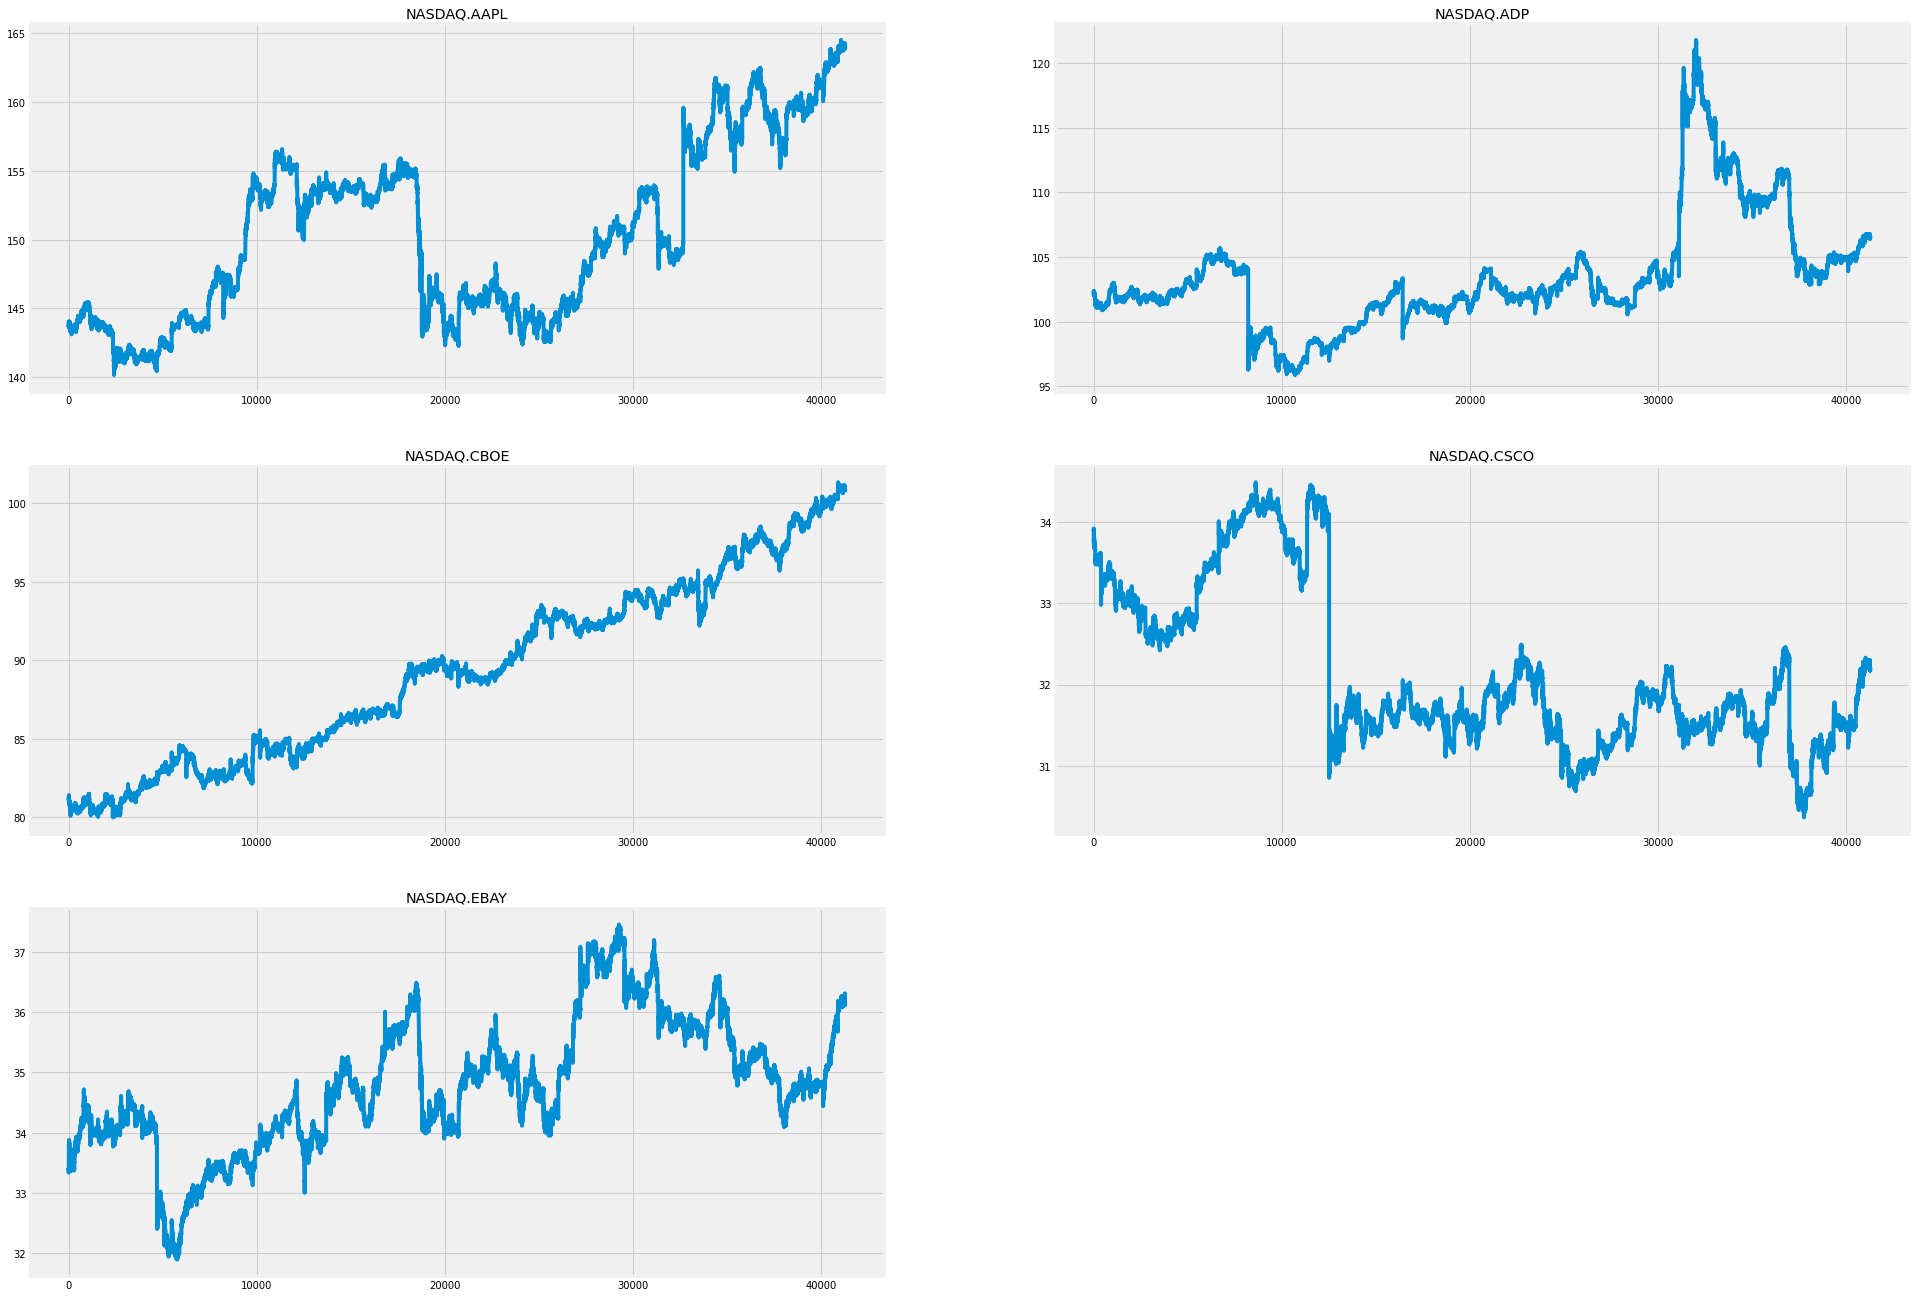

In [15]:
incr=1
plt.figure(figsize=(30,80))
for cols in stock_list:
        plt.subplot(10,2,incr)
        plt.plot(df[cols])
        plt.title(cols)
        incr+=1

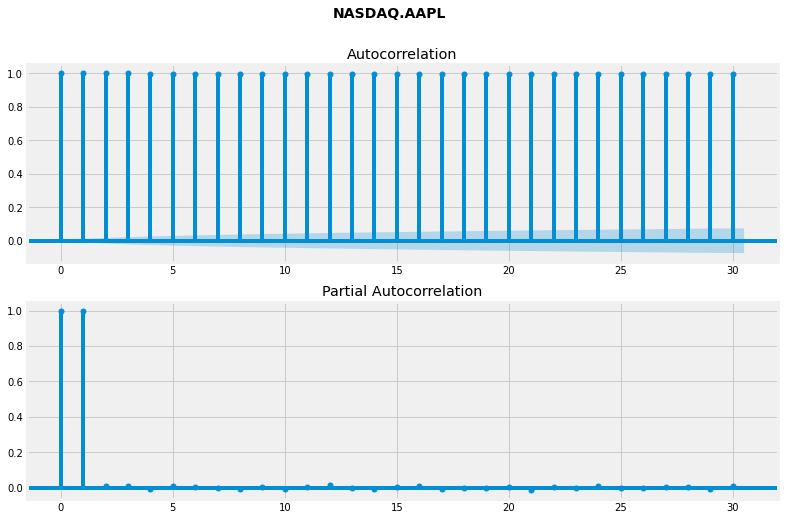

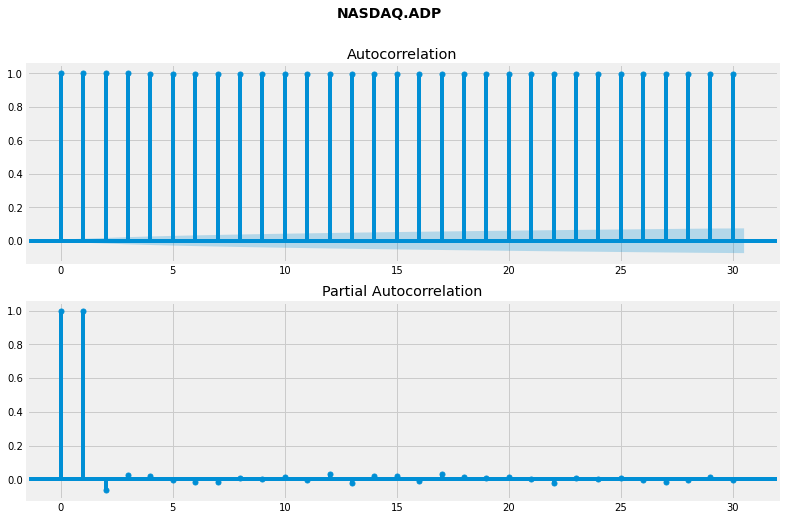

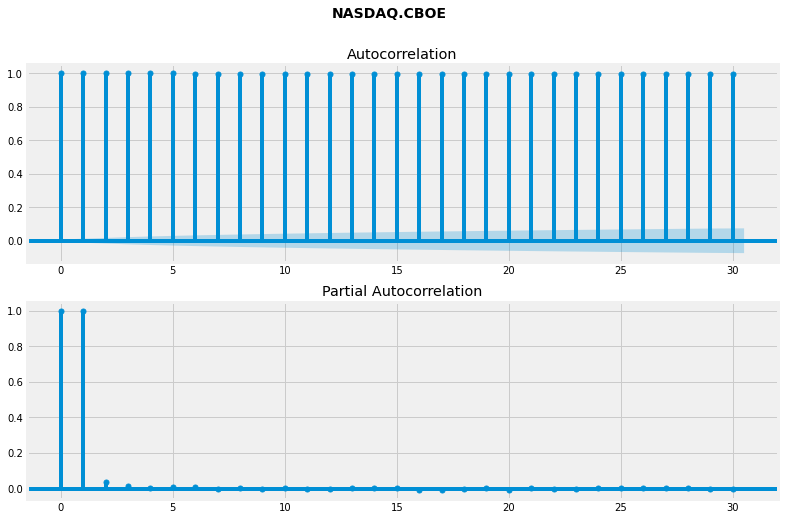

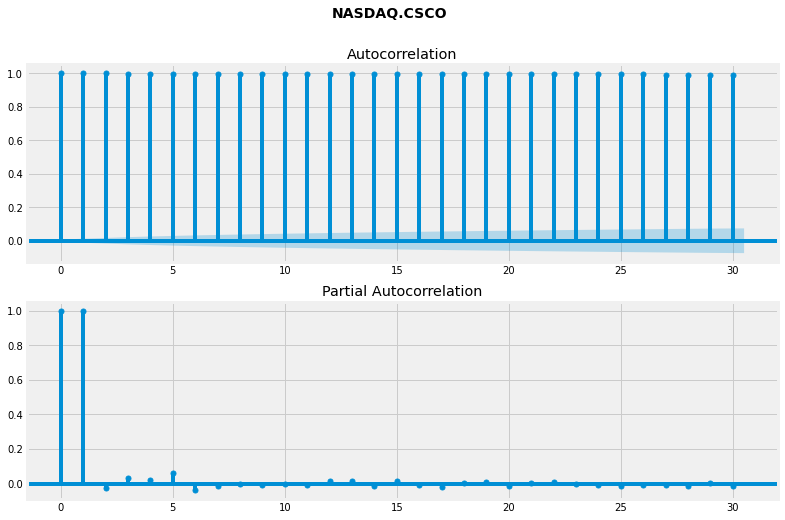

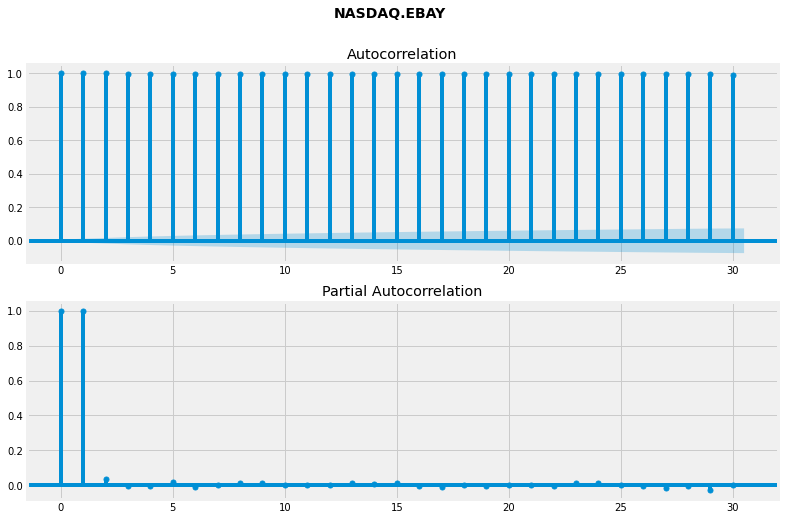

In [26]:
for cols in stock_list:
    fig = plt.figure(figsize=(12,8))
    fig.suptitle(cols, fontsize=14, fontweight='bold')
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[cols].values.squeeze(), lags=30, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[cols], lags=30, ax=ax2)

Test MSE for NASDAQ.AAPL: 0.002529449767734281


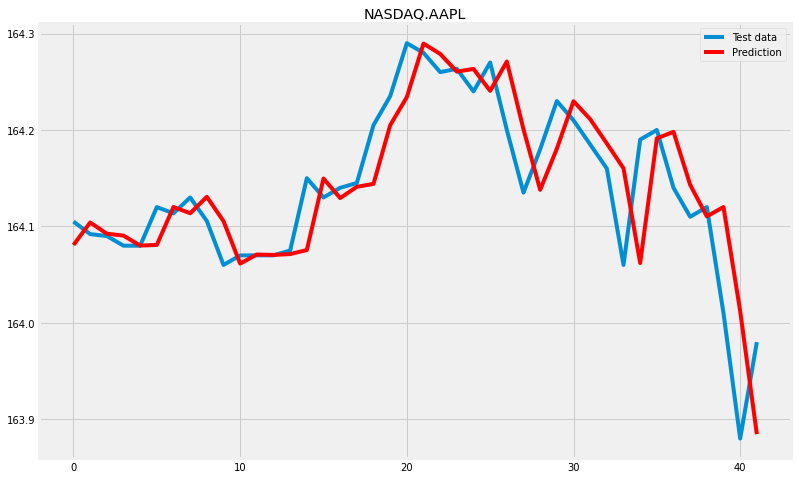

Test MSE for NASDAQ.ADP: 0.0016569566776660715


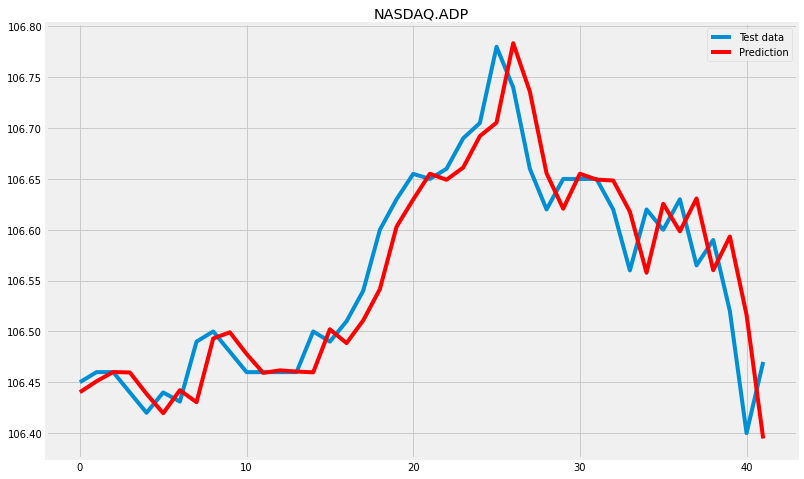

Test MSE for NASDAQ.CBOE: 0.000774280395398678


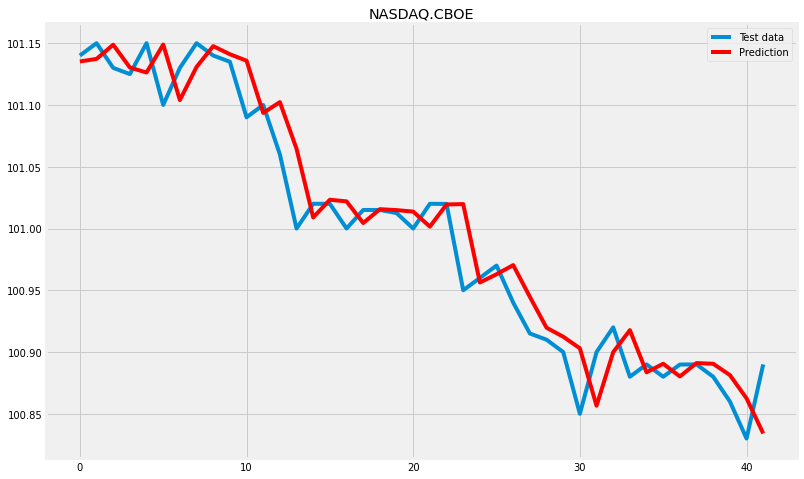

Test MSE for NASDAQ.CSCO: 0.0001832514957021212


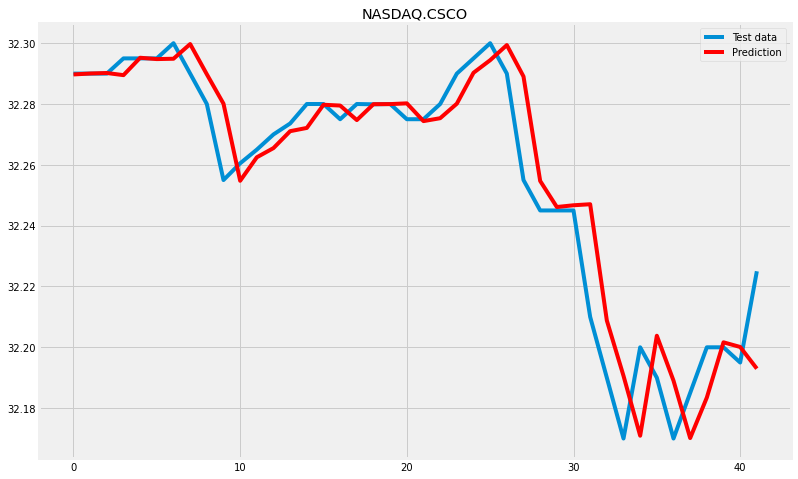

Test MSE for NASDAQ.EBAY: 0.000302160701062657


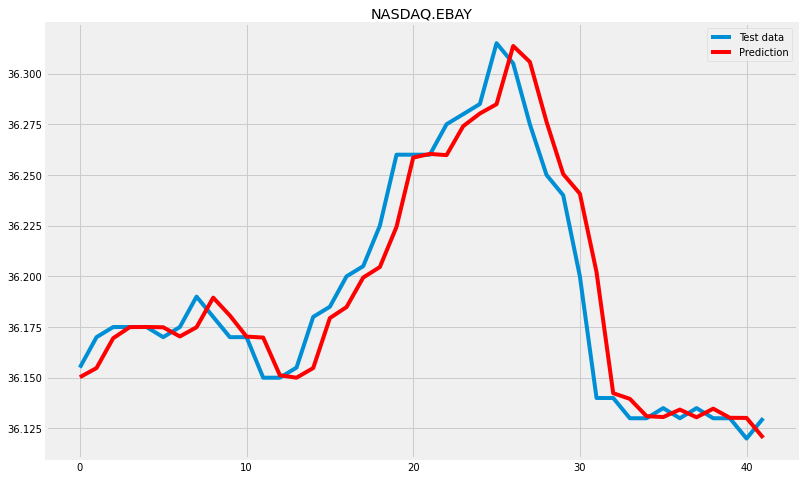

In [31]:
for col in stock_list:
    X = df[col].values
    size = int(len(X) * 0.999)
    #print(len(X))
    #print(size)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test,predictions)
    print('Test MSE for {}:'.format(col),error)
    plt.figure(figsize=(12,8))
    plt.title(col)
    plt.plot(test,label='Test data')
    plt.plot(predictions, color='red',label='Prediction')
    plt.legend()
    plt.show()